# Introduction to NLP Fundamentals in TensorFlow

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c6194a92-524a-850e-2b6d-0e20859d5467)


## Get Helper Functions

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-17 00:08:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-17 00:08:59 (87.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import series of helper functions
from helper_functions import unzip_data, create_tensorboard_callback
from helper_functions import plot_loss_curves, compare_historys

## Get a Text Dataset

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data('nlp_getting_started.zip')

--2023-02-17 00:09:05--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-02-17 00:09:05 (139 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a Text Dataset

In [5]:
import pandas as pd

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Shuffle training data
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# What does the test data look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
import random

In [12]:
# Visualize random training examples
## Create random indexes not higer than the total number of samples
random_index = random.randint(0, len(train_df) - 5)
for row in train_df_shuffled[['text', 'target']][
                    random_index:random_index + 5].itertuples():
    _, text, target = row
    print(f'Target: {target}', '(Real Disaster)' if target > 0 else \
          '(Not Real Disaster)')
    print(f'Text:\n{text}\n')
    print('---\n')

Target: 0 (Not Real Disaster)
Text:
Anyone wanna come over and watch Twister with me? #toosoon :-)

---

Target: 0 (Not Real Disaster)
Text:
2pcs 18W CREE Led Work Light  Offroad Lamp Car Truck Boat Mining 4WD FLOOD BEAM - Full reaÛ_ http://t.co/VDeFmulx43 http://t.co/yqpAIjSa5g

---

Target: 0 (Not Real Disaster)
Text:
Let's fraction the vital need for Our fatalities.  How would you break it down in #education #econom http://t.co/ZSqM8ihE1K

---

Target: 0 (Not Real Disaster)
Text:
I love the cotton candy blizzard??

---

Target: 1 (Real Disaster)
Text:
'Jet fuel cant melt steel'
'The structural failure is illogical'
'The second plane crashing into the building is fake'
'It was a bomb'

---



### Split Data into Training and Validation Sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled['text'].to_numpy(),
    train_df_shuffled['target'].to_numpy(),
    test_size=0.1,
    random_state=42
)

In [15]:
# Check the lengths
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [16]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting Text into Numbers

- **Tokenization:** direct mapping of token (word or character) to number.
- **Embedding:** create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned).

### Text Vectorization (Tokenization)

In [17]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [19]:
# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(
    # how many words in the vocabulary (gets the top x words)
    max_tokens=100,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    # create groups of n-words
    ngrams=None,
    output_mode='int',
    # max length of sequences (if None, gets the length of the longest sequence)
    output_sequence_length=None,
    # pad short sequences with zeros
    pad_to_max_tokens=True
)

In [20]:
# Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [21]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in the vocabulary
max_length = 15 # max length the sequences will be
text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length    
)

In [22]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [23]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

shape = (1, 15): 1 batch (example) and 15 words (limited)

In [24]:
# Choose random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Original Text:\n {random_sentence} \
\n\n Vectorized Version:')
text_vectorizer(random_sentence)

Original Text:
 @mochichiiiii @hikagezero IT'S IMPOSSIBLE FOR ME TOO WW like i can't survive a day without meat wew 

 Vectorized Version:


<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1,    1,   37, 2930,   10,   31,  150, 6637,   25,    8,   98,
        310,    3,  101,  228])>

In [25]:
# Get the unique words in the vocabulary
## Get all of the unique words in the training words
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'5 Most Common Words: {top_5_words}')
print(f'5 Least Common Words: {bottom_5_words}')

Number of words in vocab: 10000
5 Most Common Words: ['', '[UNK]', 'the', 'a', 'in']
5 Least Common Words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


[unk]: Unknown word (outside the vocab)

### Embedding

Important Parameters:
- `input_dim`: the size of the vocabulary
- `output_dim`: the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
- `input_length`: length of the sequences being passed to the embedding layer

In [26]:
from keras import layers

In [27]:
embedding = layers.Embedding(
    input_dim=max_vocab_length,
    output_dim=128,
    input_length=max_length
)
embedding

In [28]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f'Original Text:\n {random_sentence} \
    \n\nEmbedded Version:')

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
 Damn...was wondering where my drone ended up after the freak windstorm...?? https://t.co/dHgGxo7Mcc     

Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0087932 ,  0.03253965, -0.02806598, ..., -0.02589827,
         -0.01194085, -0.02405388],
        [-0.03823874, -0.01211985, -0.03891996, ..., -0.02945263,
         -0.03317972, -0.02595714],
        [ 0.02334252,  0.04232371, -0.01167003, ..., -0.02445248,
          0.04788122, -0.01493704],
        ...,
        [ 0.04629422,  0.03248746,  0.04621204, ...,  0.01696413,
          0.0261289 ,  0.0089751 ],
        [ 0.04629422,  0.03248746,  0.04621204, ...,  0.01696413,
          0.0261289 ,  0.0089751 ],
        [ 0.04629422,  0.03248746,  0.04621204, ...,  0.01696413,
          0.0261289 ,  0.0089751 ]]], dtype=float32)>

In [29]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.0087932 ,  0.03253965, -0.02806598, -0.02402235,  0.0185259 ,
         0.03219633,  0.00521511, -0.00880583, -0.02228842, -0.0106438 ,
         0.02102115,  0.02427772, -0.02196335, -0.01074423,  0.01735418,
        -0.02952772, -0.00469293, -0.03134789,  0.04012859,  0.03874003,
         0.01472547, -0.0061852 , -0.00519709, -0.02793047,  0.01595179,
         0.01863761,  0.03816252, -0.01758298,  0.0423531 ,  0.04628593,
         0.04945319,  0.0434307 , -0.04853109, -0.00957785, -0.0491061 ,
         0.01550308, -0.03794602, -0.02467942, -0.01129798, -0.00992076,
        -0.0494862 ,  0.04312528,  0.04803375,  0.04817761, -0.04666939,
         0.01139567,  0.03310074, -0.02216141, -0.04949477, -0.02183839,
         0.03691945,  0.04561431,  0.03297025, -0.03041989,  0.04452257,
         0.03536799, -0.04789465, -0.0338131 ,  0.04483834, -0.0455865 ,
        -0.01015271, -0.04464174, -0.02735766, -0.03059936, -0.00042366,
  

## Modeling a Text Dataset (Running Experiments)

- `Model 0`: Naive Bayes (baseline)
- `Model 1`: Feed-forward neural network (dense model)
- `Model 2`: LSTM Model (RNN)
- `Model 3`: GRU Model (RNN)
- `Model 4`: Bidirectional-LSTM Model (RNN)
- `Model 5`: 1D Convolutional Neural Network (CNN)
- `Model 6`: TensorFlow Hub Pretrained Feature Extractor
- `Model 7`: Same as model 6, but with 10% of training data

### Model 0: Getting a baseline

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [31]:
# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # Convert words to numbers using tfidf
    ('clf', MultinomialNB()) # Model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
# Evaluate the baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'The baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

The baseline model achieves an accuracy of: 79.27%


In [33]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an Evaluation Function for the Model Experiments

In [34]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [35]:
def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary
    classification model
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1-score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )
    model_results = {
        'accuracy': model_accuracy,
        'precision': model_precision,
        'recall': model_recall,
        'f1': model_f1
    }
    return model_results

In [36]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A Simple Dense Model

In [37]:
# Create a tensorboard callback
## Create a directory to save tensorboard logs
SAVE_DIR = 'model_logs'

In [38]:
# Build model with Functional API
# Inputs are 1-dimensional strings
inputs = layers.Input(shape=(1,), dtype=tf.string)
# Turn the input text into numbers
x = text_vectorizer(inputs)
# Create an embedding of the numberized inputs
x = embedding(x)
# Condense the feature vector for each token to one vector
x = layers.GlobalAveragePooling1D()(x)
# Create the output layer
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [39]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [40]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [41]:
# Fit the model
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            dir_name=SAVE_DIR,
                            experiment_name='model_1_dense'
                        )])

Saving TensorBoard log files to: model_logs/model_1_dense/20230217-000912
Epoch 1/5
215/215 [==============================] - 23s 74ms/step - loss: 0.6100 - accuracy: 0.6948 - val_loss: 0.5344 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4412 - accuracy: 0.8200 - val_loss: 0.4699 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3470 - accuracy: 0.8599 - val_loss: 0.4597 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2849 - accuracy: 0.8911 - val_loss: 0.4638 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2379 - accuracy: 0.9133 - val_loss: 0.4800 - val_accuracy: 0.7874


In [42]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7874


[0.47998446226119995, 0.787401556968689]

In [43]:
# Make some predictions and evaluate those
pred_probs_1 = model_1.predict(val_sentences)
pred_probs_1.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [44]:
# Look at a single prediction
pred_probs_1[0]

array([0.38249248], dtype=float32)

In [45]:
len(pred_probs_1)

762

In [46]:
# Look at the first 10 predictions
pred_probs_1[:10]

array([[0.38249248],
       [0.79071504],
       [0.99772674],
       [0.09912445],
       [0.107112  ],
       [0.93530613],
       [0.88873225],
       [0.9930755 ],
       [0.9662081 ],
       [0.21043523]], dtype=float32)

In [47]:
# Convert model prediction probabilities to label format
preds_1 = tf.squeeze(tf.round(pred_probs_1))
preds_1[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [48]:
# Calculate model_1 results
results_1 = calculate_results(y_true=val_labels,
                              y_pred=preds_1)
results_1

{'accuracy': 78.74015748031496,
 'precision': 0.7923216200196284,
 'recall': 0.7874015748031497,
 'f1': 0.7844114973523961}

In [49]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [50]:
import numpy as np

In [51]:
np.array(list(results_1.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing Learned Embeddings

In [52]:
# Get the vocabulary from the text vectorization layer
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [53]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [54]:
# Get the weight matrix of embedding layer
# Numerical representation of each token in the training data
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape # same size as vocab size and embedding_dim

(10000, 128)

In [55]:
import io

In [56]:
# Create embedding files
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
    if index == 0:
        continue # Skipping 0, it's padding
    vec = embed_weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')
    out_m.write(word + '\n')
out_v.close()
out_m.close()

- Downloading file from Colab to upload to [Embedding Projector](https://projector.tensorflow.org/)


```python
try:
    from google.colab import files
    files.download('vectors.tsv')
    files.download('metadata.tsv')
except Exception:
    pass
```



## Recurrent Neural Network (RNN's)

- Useful for sequence data

### Model 2: LSTM

- Long Short Term Memory
- The Structure typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense)
-> Output (label probability)
```

In [57]:
# Create an LSTM model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
## When stacking RNN cells together, return_sequences=True is needed
x = layers.LSTM(units=64, return_sequences=True)(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
# x = layers.Dense(64, activation='relu')(x)
# print(x.shape)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

(None, 15, 128)
(None, 15, 64)
(None, 64)


- (Batch size, number_tokens, size_output_vector)

In [58]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

In [59]:
# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [60]:
# Fit the model
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            SAVE_DIR,
                            "model_2_LSTM"
                        )])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230217-000958
Epoch 1/5
215/215 [==============================] - 15s 45ms/step - loss: 0.2173 - accuracy: 0.9247 - val_loss: 0.5609 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1595 - accuracy: 0.9402 - val_loss: 0.5930 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1319 - accuracy: 0.9524 - val_loss: 0.7993 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1057 - accuracy: 0.9599 - val_loss: 0.7897 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0831 - accuracy: 0.9685 - val_loss: 0.8485 - val_accuracy: 0.7703


In [61]:
# Make predictions with LSTM model
pred_probs_2 = model_2.predict(val_sentences)
pred_probs_2[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.1670592e-02],
       [7.5249052e-01],
       [9.9979681e-01],
       [1.1128882e-01],
       [4.7731624e-04],
       [9.9958533e-01],
       [9.3854642e-01],
       [9.9988651e-01],
       [9.9983513e-01],
       [3.5692388e-01]], dtype=float32)

In [62]:
# Convert model 2 pred probs to labels
preds_2 = tf.squeeze(tf.round(pred_probs_2))
preds_2[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
# Calculate model 2 results
results_2 = calculate_results(y_true=val_labels,
                              y_pred=preds_2)
results_2

{'accuracy': 77.03412073490814,
 'precision': 0.7715893693867238,
 'recall': 0.7703412073490814,
 'f1': 0.7684486602580174}

In [64]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU

- Gated Recurrent Unit

In [65]:
# Building an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.LSTM(64, return_sequences=True)(x)
# x = layers.GRU(64)(x)
# x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [66]:
# Get model summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [67]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [68]:
# Fit the model
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            SAVE_DIR,
                            "model_3_GRU"
                        )])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230217-001043
Epoch 1/5
215/215 [==============================] - 11s 42ms/step - loss: 0.1649 - accuracy: 0.9371 - val_loss: 0.7318 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0844 - accuracy: 0.9691 - val_loss: 0.7453 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0685 - accuracy: 0.9733 - val_loss: 0.9368 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0558 - accuracy: 0.9759 - val_loss: 1.3605 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0522 - accuracy: 0.9765 - val_loss: 1.1307 - val_accuracy: 0.7703


In [69]:
# Make some predictions with the GRU model
pred_probs_3 = model_3.predict(val_sentences)
pred_probs_3[:10]

24/24 [==============================] - 1s 3ms/step


array([[3.2705956e-03],
       [7.8471237e-01],
       [9.9962604e-01],
       [1.0907493e-01],
       [6.2659630e-05],
       [9.9957985e-01],
       [9.6575570e-01],
       [9.9991250e-01],
       [9.9983263e-01],
       [6.4478856e-01]], dtype=float32)

In [70]:
# Convert model 3 pred probs to labels
preds_3 = tf.squeeze(tf.round(pred_probs_3))
preds_3[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
# Calculate model 3 results
results_3 = calculate_results(y_true=val_labels,
                              y_pred=preds_3)
results_3

{'accuracy': 77.03412073490814,
 'precision': 0.7711671866902318,
 'recall': 0.7703412073490814,
 'f1': 0.7686901866564684}

### Model 4: Bidirectional RNN

- Normal RNN's go from left to right, however, a bidirectional RNN goes from right to left as well as left to right

In [72]:
# Build a bidirectional RNN
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
print(x.shape)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

(None, 15, 128)


In [73]:
# Get model summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [74]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [75]:
# Fit the model
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            SAVE_DIR,
                            "model_4_bidirectional"
                        )])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230217-001106
Epoch 1/5
215/215 [==============================] - 20s 54ms/step - loss: 0.0972 - accuracy: 0.9675 - val_loss: 1.2409 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0517 - accuracy: 0.9769 - val_loss: 1.2632 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0436 - accuracy: 0.9796 - val_loss: 1.4930 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0420 - accuracy: 0.9807 - val_loss: 1.2859 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0406 - accuracy: 0.9813 - val_loss: 1.4769 - val_accuracy: 0.7638


In [76]:
# Make predictions with the bidirectional model
pred_probs_4 = model_4.predict(val_sentences)
pred_probs_4[:10]

24/24 [==============================] - 1s 4ms/step


array([[1.2327208e-01],
       [7.4897617e-01],
       [9.9995899e-01],
       [1.0229906e-01],
       [1.4327306e-05],
       [9.9993372e-01],
       [9.9358976e-01],
       [9.9998951e-01],
       [9.9997520e-01],
       [9.9873716e-01]], dtype=float32)

In [77]:
# Convert pred probs to labels
preds_4 = tf.squeeze(tf.round(pred_probs_4))
preds_4[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [78]:
# Calculate the results of the model
results_4 = calculate_results(y_true=val_labels,
                              y_pred=preds_4)
results_4

{'accuracy': 76.37795275590551,
 'precision': 0.7633947745168217,
 'recall': 0.7637795275590551,
 'f1': 0.7631568413202727}

## Convolution Neural Networks for Text (and other types of sequences)

- Conv2D for images
- Conv1D for text

<br>

- Typical structure:

```
Inputs(text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

### Model 5: Conv1D

In [79]:
# Test out an embedding layer, Conv1D and max pooling
## Turn target sentence into embedding
embedding_test = embedding(text_vectorizer(['This is a test sentence']))
conv_1d = layers.Conv1D(filters=32,
                        # Looks at 5 words at a time
                        kernel_size=5,
                        activation='relu',
                        padding='valid')
# Pass test embedding through conv1d layer
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
# Getting the most important feature
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [80]:
# embedding_test

In [81]:
# conv_1d_output

In [82]:
# max_pool_output

In [83]:
# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, 
                  activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1D')

In [84]:
# Get model summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [85]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [86]:
# Fit the model
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            SAVE_DIR,
                            'Conv1D'
                        )])

Saving TensorBoard log files to: model_logs/Conv1D/20230217-001144
Epoch 1/5
215/215 [==============================] - 10s 39ms/step - loss: 0.1226 - accuracy: 0.9612 - val_loss: 0.9223 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0768 - accuracy: 0.9718 - val_loss: 1.0340 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0611 - accuracy: 0.9777 - val_loss: 1.1349 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0566 - accuracy: 0.9775 - val_loss: 1.2075 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0534 - accuracy: 0.9780 - val_loss: 1.2044 - val_accuracy: 0.7664


In [87]:
# Make predictions with the model
pred_probs_5 = model_5.predict(val_sentences)
pred_probs_5[:10]

24/24 [==============================] - 0s 2ms/step


array([[1.08601645e-01],
       [8.14953983e-01],
       [9.99942660e-01],
       [7.23585337e-02],
       [4.02800069e-08],
       [9.97519910e-01],
       [9.71088707e-01],
       [9.99967694e-01],
       [9.99999166e-01],
       [9.25681889e-01]], dtype=float32)

In [88]:
# Convert model 5 pred probs to labels
preds_5 = tf.squeeze(tf.round(pred_probs_5))
preds_5[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [89]:
# Evaluate model 5 predictions
results_5 = calculate_results(y_true=val_labels,
                              y_pred=preds_5)
results_5

{'accuracy': 76.64041994750657,
 'precision': 0.7672473559947978,
 'recall': 0.7664041994750657,
 'f1': 0.7646647680054942}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [90]:
import tensorflow_hub as hub

In [91]:
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence,
                'When you call universal sentence encoder on a sentence, \
                        it turns into numbers.'])
embed_samples[0][:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.01157028,  0.0248591 ,  0.02878048, -0.012715  ,  0.03971538,
        0.0882776 ,  0.02680984,  0.05589836, -0.0106873 , -0.00597291,
        0.00639323, -0.01819518,  0.00030813,  0.09105888,  0.05874644,
       -0.03180628,  0.01512474, -0.05162929,  0.00991367, -0.06865347,
       -0.04209306,  0.02678981,  0.03011006,  0.00321069, -0.00337973,
       -0.04787357,  0.0226672 , -0.00985925, -0.04063613, -0.01292092,
       -0.04666384,  0.05630299, -0.03949255,  0.00517686,  0.02495829,
       -0.0701444 ,  0.02871508,  0.04947684, -0.00633979, -0.08960192,
        0.02807118, -0.00808364, -0.01360602,  0.0599865 , -0.10361787,
       -0.05195374,  0.00232954, -0.02332531, -0.03758105,  0.03327728],
      dtype=float32)>

In [92]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [ 0.0451036 , -0.08545386, -0.01134648, ..., -0.01502884,
         0.04709535, -0.01545729]], dtype=float32)>

In [93]:
# Create a Keras layer using the USE pretrained layer from TF Hub
sentence_encoder_layer = hub.KerasLayer(
    'https://tfhub.dev/google/universal-sentence-encoder/4',
    input_shape=[], # Variable length
    dtype=tf.string,
    trainable=False,
    name='USE'
)

In [94]:
# Create a model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [95]:
# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [96]:
# Get model summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [97]:
# Train a classifier on top of USE pretrained embeddings
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            SAVE_DIR,
                            "tf_hub_sentence_encoder"
                        )])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230217-001301
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5060 - accuracy: 0.7806 - val_loss: 0.4477 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4151 - accuracy: 0.8170 - val_loss: 0.4397 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4010 - accuracy: 0.8232 - val_loss: 0.4389 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3930 - accuracy: 0.8232 - val_loss: 0.4299 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3851 - accuracy: 0.8305 - val_loss: 0.4273 - val_accuracy: 0.8176


In [98]:
# Make predictions with USE TF Hub Model
pred_probs_6 = model_6.predict(val_sentences)
pred_probs_6[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.23463394],
       [0.8045968 ],
       [0.99048775],
       [0.23499855],
       [0.7648988 ],
       [0.7690294 ],
       [0.9811255 ],
       [0.9840171 ],
       [0.9575029 ],
       [0.1024494 ]], dtype=float32)

In [99]:
# Convert pred probs to labels
preds_6 = tf.squeeze(tf.round(pred_probs_6))
preds_6[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [100]:
# Calculate model 6 performance metrics
results_6 = calculate_results(y_true=val_labels,
                              y_pred=preds_6)
results_6

{'accuracy': 81.75853018372703,
 'precision': 0.8176812049079124,
 'recall': 0.8175853018372703,
 'f1': 0.8170037520339405}

## Model 7: TF Hub Pretrained USE with 10% of Training Data

In [101]:
### NOTE: Making data splits like below leads to data leakage ###

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[['text', 'target']].sample(
#                                         frac=0.1,
#                                         random_state=42
#                                     )
# train_10_percent.head(), len(train_10_percent), len(train_df_shuffled)

# train_sentences_10_percent = train_10_percent['text'].to_list()
# train_labels_10_percent = train_10_percent['target'].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [102]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [103]:
# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [104]:
# Building a model the same as model 6
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Get model summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [105]:
# Fit the model
history_7 = model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(
                            SAVE_DIR,
                            "tf_hub_sentence_encoder_10_percent_split"
                        )])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_split/20230217-001326
Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 0.6675 - accuracy: 0.6453 - val_loss: 0.6495 - val_accuracy: 0.6929
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5992 - accuracy: 0.7883 - val_loss: 0.5955 - val_accuracy: 0.7559
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5271 - accuracy: 0.8073 - val_loss: 0.5423 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4680 - accuracy: 0.8175 - val_loss: 0.5099 - val_accuracy: 0.7651
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4258 - accuracy: 0.8394 - val_loss: 0.4931 - val_accuracy: 0.7769


In [106]:
# Make predictions with the model
pred_probs_7 = model_7.predict(val_sentences)
pred_probs_7[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.18543777],
       [0.5925264 ],
       [0.8680162 ],
       [0.4139638 ],
       [0.5944101 ],
       [0.66767365],
       [0.86237663],
       [0.8013438 ],
       [0.83094347],
       [0.1410432 ]], dtype=float32)

In [107]:
# Turn pred probs into labels
preds_7 = tf.squeeze(tf.round(pred_probs_7))
preds_7[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [108]:
# Evaluate model 7 predictions
results_7 = calculate_results(y_true=val_labels,
                              y_pred=preds_7)
results_7

{'accuracy': 77.69028871391076,
 'precision': 0.7784265812728361,
 'recall': 0.7769028871391076,
 'f1': 0.7750036673315875}

## Comparing the Performance of Each of the Models

In [112]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({
    'Baseline': baseline_results,
    '1_Simple_Dense': results_1,
    '2_LSTM': results_2,
    '3_GRU': results_3,
    '4_Bidirectional': results_4,
    '5_Conv1D': results_5,
    '6_TF_Hub_USE_Encoder': results_6,
    '7_TF_Hub_USE_Encoder_10_percent': results_7
})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Baseline,79.265092,0.811139,0.792651,0.786219
1_Simple_Dense,78.740157,0.792322,0.787402,0.784411
2_LSTM,77.034121,0.771589,0.770341,0.768449
3_GRU,77.034121,0.771167,0.770341,0.768690
4_Bidirectional,76.377953,0.763395,0.763780,0.763157
5_Conv1D,76.640420,0.767247,0.766404,0.764665
6_TF_Hub_USE_Encoder,81.758530,0.817681,0.817585,0.817004
7_TF_Hub_USE_Encoder_10_percent,77.690289,0.778427,0.776903,0.775004


In [113]:
# Reduce the accuracy to the same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy'] / 100
all_model_results

,accuracy,precision,recall,f1
Baseline,0.792651,0.811139,0.792651,0.786219
1_Simple_Dense,0.787402,0.792322,0.787402,0.784411
2_LSTM,0.770341,0.771589,0.770341,0.768449
3_GRU,0.770341,0.771167,0.770341,0.768690
4_Bidirectional,0.763780,0.763395,0.763780,0.763157
5_Conv1D,0.766404,0.767247,0.766404,0.764665
6_TF_Hub_USE_Encoder,0.817585,0.817681,0.817585,0.817004
7_TF_Hub_USE_Encoder_10_percent,0.776903,0.778427,0.776903,0.775004


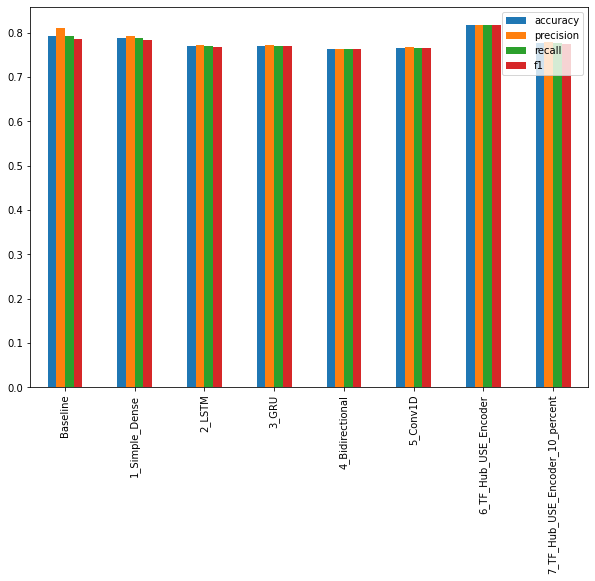

In [116]:
# Plot and compare all of the model results
all_model_results.plot(
    kind='bar',
    figsize=(10, 7)
).legend()

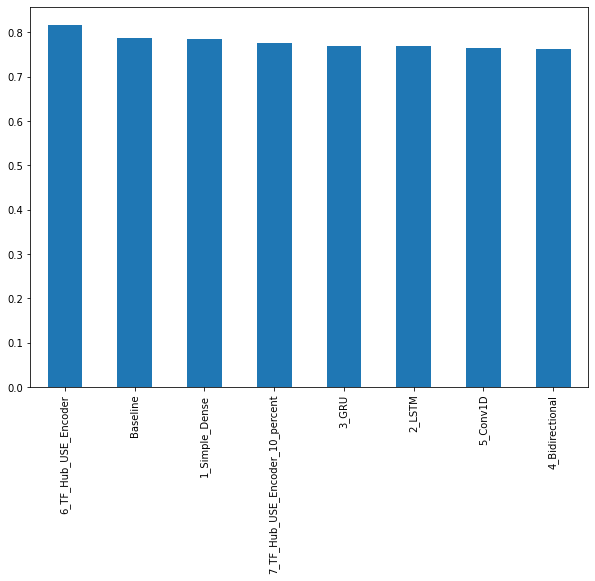

In [117]:
# Sort model results by f1-score
all_model_results.sort_values('f1', ascending=False)['f1'].plot(
    kind='bar',
    figsize=(10, 7)
)

## Saving and Loading a Trained Model

In [118]:
results_6

{'accuracy': 81.75853018372703,
 'precision': 0.8176812049079124,
 'recall': 0.8175853018372703,
 'f1': 0.8170037520339405}

In [119]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save('model_6.h5')

In [120]:
# Load model with custom Hub Layer (required HDF5 format)
loaded_model = tf.keras.models.load_model(
    'model_6.h5',
    custom_objects={'KerasLayer': hub.KerasLayer}
)

In [121]:
# How does the loaded model perform
loaded_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4273 - accuracy: 0.8176


[0.4273204207420349, 0.817585289478302]

In [122]:
# Save TF Hub Sentence Encoder model to SavedModel format
model_6.save('model_6_SavedModel_format')

In [123]:
# Load in a model from the SavedModel format
loaded_SavedModel_model = tf.keras.models.load_model('model_6_SavedModel_format')

In [124]:
# How does the loaded model perform
loaded_SavedModel_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4273 - accuracy: 0.8176


[0.4273203909397125, 0.817585289478302]

## Finding the Most Wrong Examples

In [125]:
# Download a pretrained model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-02-17 01:05:46--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  19.7MB/s    in 47s     

2023-02-17 01:06:34 (19.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index

In [126]:
pretrained_model = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
pretrained_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [127]:
pretrained_model_pred_probs = pretrained_model.predict(val_sentences)
pretrained_model_preds = tf.squeeze(tf.round(pretrained_model_pred_probs))
pretrained_model_preds[:10]

24/24 [==============================] - 1s 19ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [128]:
# Create DataFrame with validation sentences and 
# best performing model predictions
val_df = pd.DataFrame({
    'Text': val_sentences,
    'Target': val_labels,
    'Pred': pretrained_model_preds,
    'Pred Probs': tf.squeeze(pretrained_model_pred_probs)
})
val_df.head()

,Text,Target,Pred,Pred Probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [132]:
# Find the wrong predictions and sorte by prediction probabilities
most_wrong = val_df[val_df['Target'] != val_df['Pred']].sort_values(
    'Pred Probs',
    ascending=False
)
most_wrong[:10] # False Positives

,Text,Target,Pred,Pred Probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [134]:
most_wrong.tail() # False Negatives

,Text,Target,Pred,Pred Probs
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [135]:
# Check the false positives
for row in most_wrong[:10].itertuples():
    _, text, target, pred, pred_prob = row
    print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
    print(f'Text:\n{text}\n')
    print('____\n')

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

____

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

____

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

____

Target: 0, Pred: 1.0, Prob: 0.8354544639587402
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

____

Target: 0, Pred: 1.0, Prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

____

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

____

In [137]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, pred_prob = row
    print(f'Target: {target}, Pred: {pred}, Prob: {pred_prob}')
    print(f'Text:\n{text}\n')
    print('____\n')

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

____

Target: 1, Pred: 0.0, Prob: 0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

____

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

____

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

____

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

____

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

____

Target: 1, Pred: 0.0, Prob: 0

## Making Predictions on the Test Dataset

In [141]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
    # The model expects a list as input
    pred_prob = tf.squeeze(pretrained_model.predict([test_sample]))
    pred = tf.round(pred_prob)
    print(f'Pred: {int(pred)}, Prob: {pred_prob}')
    print(f'Text:\n{test_sample}\n')
    print('____\n')

1/1 [==============================] - 0s 64ms/step
Pred: 0, Prob: 0.015199631452560425
Text:
I would love to #win Suze's amazing filled #beauty #bag #giveaway! Contents from L'Occitane Body Shop &amp; Lavera. http://t.co/hEjJVVRsTY

____

1/1 [==============================] - 0s 78ms/step
Pred: 0, Prob: 0.10865471512079239
Text:
I lava you

____

1/1 [==============================] - 0s 68ms/step
Pred: 0, Prob: 0.06657345592975616
Text:
I'm just not a relationship person. That's why when I have a crush on someone I always think they're not going to feel the same way

____

1/1 [==============================] - 0s 45ms/step
Pred: 0, Prob: 0.11407142132520676
Text:
If I ever saw a dog trapped in a hot car you better believe I'm busting your fucking windows open and taking your dog

____

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.11014097183942795
Text:
@USCOURT If 90BLKs&amp;8WHTs colluded 2 take WHT F @USAgov AUTH Hostage&amp;2 make her look BLK w/Bioterro

## The Speed/Score Tradeoff

In [142]:
import time

In [143]:
def pred_timer(model, samples):
    """
    Times how long a model takes to make predictions on samples
    """
    # Get start time
    start_time = time.perf_counter()
    # Make predctions
    model.predict(samples)
    # Get finish time
    end_time = time.perf_counter()
    # Calculate how long predictions took to make
    total_time = end_time - start_time
    time_per_pred = total_time / len(samples)
    return total_time, time_per_pred

In [145]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(
    model=pretrained_model,
    samples=val_sentences
)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 21ms/step


(0.7475113959999362, 0.0009809860839894175)

In [146]:
# Calculate the baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.07474447399999917, 9.808986089238737e-05)

In [148]:
# Get results for the pretrained model
pretrained_results = calculate_results(y_true=val_labels,
                                       y_pred=pretrained_model_preds)
pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

In [147]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'F1-score')

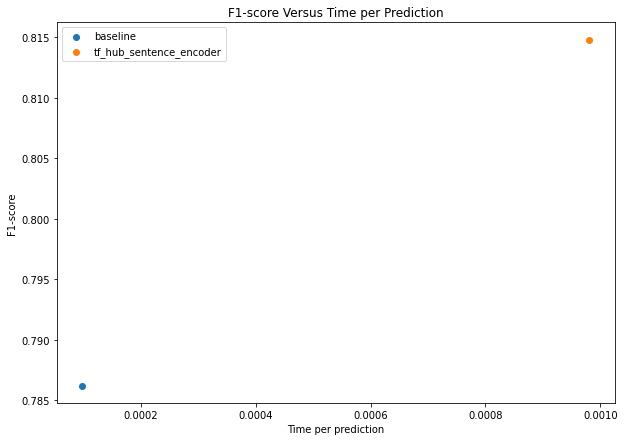

In [149]:
plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results['f1'], label='baseline')
plt.scatter(model_6_time_per_pred, pretrained_results['f1'], 
                                            label='tf_hub_sentence_encoder')
plt.legend()
plt.title('F1-score Versus Time per Prediction')
plt.xlabel('Time per prediction')
plt.ylabel('F1-score')